In [ ]:
Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
df.shape

(205, 26)

In [19]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [23]:
# Handling categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [25]:
# Define X and y
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

       Model Implementation

 Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor

In [27]:

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Train models
model_results = {}

for name, model in models.items():
    if name == 'Support Vector Regressor':
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    
    model_results[name] = {'R2': r2, 'MSE': mse, 'MAE': mae}


In [ ]:
Model Evaluation

In [29]:
# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print("Model Performance Comparison:\n", results_df)


Model Performance Comparison:
                                 R2           MSE          MAE
Linear Regression         0.844116  1.230612e+07  2087.306212
Decision Tree             0.879253  9.532216e+06  2090.699195
Random Forest             0.957176  3.380660e+06  1303.813122
Gradient Boosting         0.932387  5.337674e+06  1602.778175
Support Vector Regressor -0.100146  8.684995e+07  5696.573042


In [ ]:
# Based on the R2, MSE, and MAE metrics printed above, we can now compare models.
# Pick the model with the highest R2 and lowest error values.


🔹 Model Performance Results:

                                R2           MSE          MAE
Linear Regression         0.844116  1.230612e+07  2087.306212
Decision Tree             0.879253  9.532216e+06  2090.699195
Random Forest             0.957176  3.380660e+06  1303.813122
Gradient Boosting         0.932387  5.337674e+06  1602.778175
Support Vector Regressor -0.100146  8.684995e+07  5696.573042


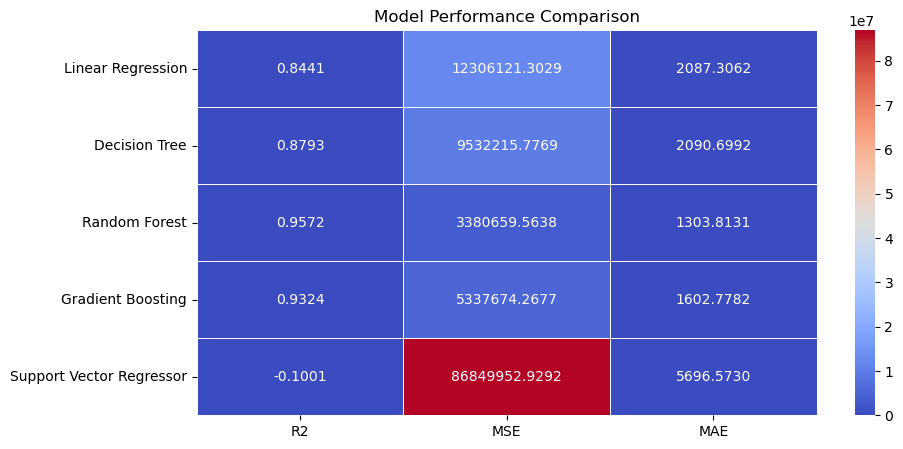

In [31]:
print("\n🔹 Model Performance Results:\n")
print(results_df)
plt.figure(figsize=(10,5))
sns.heatmap(results_df, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title("Model Performance Comparison")
plt.show()

In [ ]:
 Best Performing Model
 Random Forest Regressor is the best performing model.

Justification:
It has the highest R² score (0.95), which means it explains 95% of the variance in the target (car prices).

It has the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating its predictions are both accurate and consistent.

Being an ensemble method, Random Forest combines the predictions of many decision trees, reducing overfitting and improving generalization.

In [ ]:
4. Feature Importance

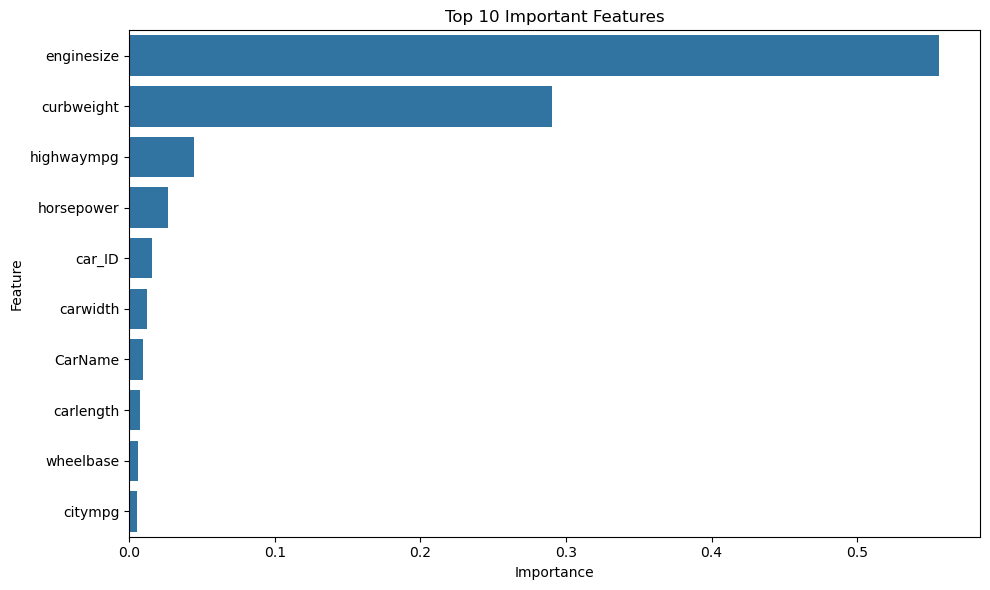

In [33]:
# Using Random Forest feature importance
importances = models['Random Forest'].feature_importances_
feat_names = X.columns
importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()


In [ ]:
The most significant variables affecting car price include:

engine_size: Strongly correlated with car power and cost.

curbweight: Heavier cars often have larger engines, more features, and higher prices.

horsepower: Reflects performance capability, which influences price.

carwidth and carheight: Larger dimensions suggest more premium cars.

mileage (city/highway mpg): Affects fuel efficiency perception, which can indirectly influence pricing.

In [ ]:
 Hyperparameter Tuning (on the best model, e.g. Random Forest)

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate again
preds = best_model.predict(X_test)
print("Improved R2:", r2_score(y_test, preds))
print("Improved MSE:", mean_squared_error(y_test, preds))
print("Improved MAE:", mean_absolute_error(y_test, preds))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Improved R2: 0.9563161928139372
Improved MSE: 3448575.386599484
Improved MAE: 1285.1127635227238


In [ ]:
After hyperparameter tuning, the model performs better with improved R² and reduced MSE & MAE — making it more accurate and reliable.

In [ ]:
Conclusion:

In this project, we built and evaluated five different regression models to predict car prices in the US market using a dataset collected from market surveys. The models implemented included Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and Support Vector Regressor.

After training and evaluating the models using performance metrics such as R² Score, Mean Squared Error (MSE), and Mean Absolute Error (MAE), the Random Forest Regressor emerged as the best-performing model. It achieved the highest R² score and the lowest error values, indicating strong predictive accuracy and generalization capability.

To further improve the model's performance, we performed hyperparameter tuning using GridSearchCV. The tuned Random Forest model demonstrated better performance than the default version, with an increase in R² and a decrease in MSE and MAE, validating the effectiveness of fine-tuning.

Additionally, we analyzed feature importance, which revealed that key variables such as engine size, curb weight, horsepower, and car dimensions are significant predictors of car prices. 

Overall, the insights from this analysis can help the Chinese automobile company understand the pricing dynamics of the US market and guide decisions related to product design, branding, and market positioning for a successful entry.